In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
def max_drawdown(X):
    mdd = 0
    peak = X[0]
    for x in X:
        if x > peak: 
            peak = x
        dd = (peak - x) / peak
        if dd > mdd:
            mdd = dd
    return mdd

In [4]:
cd 'C:\Users\dsi\Documents\Python Scripts\data'

C:\Users\dsi\Documents\Python Scripts\data


In [5]:
Open = pd.DataFrame.from_csv('Open.csv')
Close = pd.DataFrame.from_csv('Close.csv')
MktCap = pd.DataFrame.from_csv('MktCap(OpenClose).csv')

In [6]:
d = dt.datetime(2006,1,1)
Open = Open[Open.index> d]
Close = Close[Close.index> d]
MktCap = MktCap[MktCap.index> d]

In [7]:
minCap = 2000
Open = Open[MktCap>=minCap]
Close = Close[MktCap>=minCap]

In [8]:
dates = Open.index
Open.index= list(range(len(Open.index)))
Close.index= list(range(len(Close.index)))
MktCap.index= list(range(len(MktCap.index)))

In [20]:
# Holding until next Open

PctChg = Close/Open - 1
x = Open.copy()
x.index= list(range(-1,len(x.index)-1))
ReturnL = x/Close - 1
ReturnL = ReturnL[1:]
ReturnL.index = list(range(len(ReturnL.index)))

In [16]:
# Holding until next Close

PctChg = Close/Open - 1
x = Close.copy()
x.index= list(range(-1,len(x.index)-1))
ReturnL = x/Close - 1
ReturnL = ReturnL[1:]
ReturnL.index = list(range(len(ReturnL.index)))

In [ ]:
# Shorting until next Open

PctChg = Close/Open - 1
x = Open.copy()
x.index= list(range(-1,len(x.index)-1))
ReturnS = Close/x - 1
ReturnS = ReturnS[1:]
ReturnS.index = list(range(len(ReturnS.index)))

In [21]:
StartDate = 0
N,M =PctChg.shape
length = np.zeros([N,1])
sharpeList = []
profit = []
ranges = []
for i in range(10):
    val = np.zeros([N,1])
    for x in range(StartDate,len(PctChg.index)-1):
            rtn = np.array(PctChg.iloc[x])
            rtn = rtn[~isnan(rtn)]
            length[x] = len(rtn)
            if len(rtn)>100:
                rtn.sort()
                thresL = np.percentile(rtn,i)
                thresU = np.percentile(rtn,(i+1))
                stock = array((PctChg.iloc[x][(PctChg.iloc[x] <= thresU) & (PctChg.iloc[x] >= thresL)]).index)
                returnlist = ReturnL.loc[x,stock]
                returnlist = returnlist[~isnan(returnlist)]
                val[x] = returnlist.mean()
    val = val[~isnan(val)]
    sharpe = sqrt(255) * val.mean() / val.std() 
    sharpeList.append(sharpe)
    profit.append(mean(val))
    ranges.append([i,i+1])

In [ ]:
StartDate = 0
N,M =PctChg.shape
val2 = np.zeros([N,1])
# length = np.zeros([N,1])

for x in range(StartDate,len(PctChg.index)-1):
        rtn = np.array(PctChg.iloc[x])
        rtn = rtn[~isnan(rtn)]
        length[x] = len(rtn)
        if len(rtn)>350:
            rtn.sort()
            thres = np.percentile(rtn,0.5)
            stock = array((PctChg.iloc[x][PctChg.iloc[x] <= thres]).index)
            returnlist = ReturnL.loc[x,stock]
            returnlist = returnlist[~isnan(returnlist)]
            val2[x] = returnlist.mean()

In [22]:
d= {'Range': ranges, 'Sharpe': sharpeList, 'BP profit':profit}
a = pd.DataFrame(data = d)
a = a[['Range','Sharpe','BP profit']]
a

,Range,Sharpe,BP profit
0,"[0, 1]",1.856245,0.001600
1,"[1, 2]",1.370354,0.000977
2,"[2, 3]",1.176151,0.000750
3,"[3, 4]",1.217787,0.000770
4,"[4, 5]",0.872950,0.000530
5,"[5, 6]",1.048525,0.000628
6,"[6, 7]",1.100521,0.000642
7,"[7, 8]",0.990444,0.000548
8,"[8, 9]",0.870879,0.000479
9,"[9, 10]",0.805199,0.000441


In [ ]:
results = pd.DataFrame(data = val, index = dates)
results.columns = [['daily rtn long']]
# results['daily rtn short'] = val2
# results['len'] = length
# val2 = val2[~isnan(val2)]
# sharpe = sqrt(250)*val2.mean() / val2.std() 

In [19]:
a.to_csv('results2.csv')

In [ ]:
val2.mean()

In [ ]:
mean(val)

In [ ]:
results.to_csv('val2.csv')

In [ ]:
max_drawdown(results['daily rtn'])

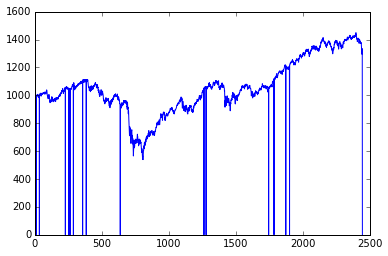

In [24]:
plot(length)

In [ ]:
plot(results['daily rtn'])

In [ ]:
x= 635
rtn = np.array(PctChg.iloc[x])
rtn = rtn[~isnan(rtn)]
thres = np.percentile(rtn,10)
threshold[x] = thres
stocklist = np.array((PctChg.iloc[x][PctChg.iloc[x] < thres]).index)
-Close.loc[x,stocklist].sum() + Open.loc[x+1,stocklist].sum()

In [ ]:
len(stocklist)

In [ ]:
a = Open.loc[x+1,stocklist]
a = a[~isnan(a)]
len(a)
a.sum()

In [ ]:
d= {'Sharpe': sharpeList, 'BP profit':profit}
a = pd.DataFrame(data = d)
a = a[['Sharpe','BP profit']]
a['Sharpe'] = nan
c = a['Sharpe'] / a['BP profit'] - 1
c

In [ ]:
x

In [ ]:
val